# <center> Python Programming in Energy Science 2 </center>

## <center> Lecture 2, 16 April 2025 </center>

<img src="files/pycourse2.png" width="300" />

-------------------------------

### **Contents**
1. Introduction to ML
2. Test case application


--------------------------------

Lecturer: 

Sandra Schwegmann
Sandra.Schwegmann@iwes.fraunhofer.de

# (1) Introduction

## (1.1) Why has Machine Learning (ML) been established

Machine learning has been established to 
- ease and improve solutions for task which would otherwise need a lot of human work
- find solutions for complex processes where traditional ways might fail

Machine learning (ML) aims to find patterns, correlations and relations in data and use them for learning. Thus, with more information (training material), solutions can be found and improved. An advantage is, that ML methods do not stick to a certain pattern but are flexible. An example is your spam filter. You start filtering spam with a training, by teaching the algorithm that certain emails are spam. The ML algorithms learns with each new information and starts to filter on its own based on the learned information. The information comes not only from you but also from many other people. Over time, filtering becomes better and better and can adapt to changes, for example if spammer change a certain phrase in the title because it has so many training information. If you would have to do this filter on your own, you would need to implement a long list of cases for which your programm filters out spam emails. This would be based on your own information, and it needs to be adapted on your own if spammer change phrases. Thus, ML can ease your life!

## (1.2) What is ML

Machine learning is a part of Artificial Intelligence and is the science about teaching a computer to learn without explicitely programming what it has to learn. What it learns is finding patterns in a set of data and use it to make the best possible decisions or predictions. A subset of ML leads to Deep Learning where even more complex processes may be understood.  

<center> <img src="files/AI_ML_DL.png" width="500" /> 
<h6>     
Source: https://becominghuman.ai/how-to-get-the-perfect-start-in-ai-ml-as-newbie-learn-the-art-in-just-5-mins-cba28d2705e4
<h6> </center>


Machine learning is divided into three areas: Supervised learning, unsupervised learning and reinforcement learning. 

**Supervised learning** \
The training data already have the solutions, so called labels. In case of the spam filter example, the filter gets the information during the training, which email is spam and which not. Another example is wind speed prediction: in supervised learning an algorithm may be trained on wind speed, wind direction, surrounding temperature and other relevant information from a nearby measurement in order to predict data gaps at another position. 



<center> <img src="files/MLapplications.jpg" width="600" /> 
<h6> Source: https://datute.net/bigdata.html <h6> </center>


**Unsupervised learning**\
Trainingsdata do not contain labels, the algorithm tries to learn without having a relation to correct solutions by screening patterns in the data and structuring them. 
<center> <img src="files/SupervisedVsUnsupervised.png" width="500" /> </center>

**Reinforcement learning**\
Programm is called Agent - performes actions and becomes rewarded/punished. From this treatment it learnes over time how to find the best action. Example: Chess event - Agent played many times against itself to find best solution for every action. Using this information it won against the world champion. 

## (1.3) How do I use ML

**Advice:** Structure your project.
You can follow the data science lifecycle for this.

**Scoping**\
Define which question you like to answer or what is the task about. Define the objectives for the problem that needs to be tackled. Find out, which data you have and which ones might be helpful in addion (data mining).

**Data cleaning**\
Fix any inconsistencies like missing data, undesired duplicates, inconsistencies in, e.g., temporal resolution, unrealistic values.

**Data exploration**\
Find out what is in your data. What is the data already telling you. Visualize the data and form your hypotheses about your defined problem.

<center> <img src="files/lifeCycleDS2.png" width="500" /> 
    <h6> Source: © Copyright Deutsches Klimarechenzentrum GmbH (https://docs.dkrz.de/doc/software%26services/machine-learning/index.html)) <h6> </center>

**Feature engineering**\
Select the features that may help you in solving your problem and create new ones from your raw data set. This might be a month column from your datetime object or differences between two variables that may lead to another variable, like the difference of surface temperature and temperature at another hight to get an indicator for the stratification. 

**Model development**\
Chose the model you want to use and train it. Depending on your problem model solution may change. In supervised learning, linear regression, decision trees, ensemble methods, K-nearest neighbors, support vector machines and for complex processes neural networks are often used. An evaluation of the performance after the training helps you to decide whether you have to adapt the model setup or use it right now for making predictions. 


<center> <img src="files/Modelle.png" width="700" /> </center>

**Verification**\
Make sure that you have some test data left over which the trainings process has never seen. These data aim to verify how good your model is able to perform prediction from new data. For that, the data is split into trainings and test data before the modelling process has started. 
Visualize your findings. 


<center> <img src="files/CV_Methode.png" width="700" /> </center>

**Workflow tuning**\
You may adapt your model for any improvement reasons.

**Evaluation and roll-out**\
Proof your results. Do they answer your questions? Discuss with others using visualizations.

## (1.4) For what do we use ML

ML can be used for several applications, like recognising credit card fraud, predicting annual sales or finding special patterns in images like cancer cells, to mention only very few of them.

Here, we use it for the **M**easure-**C**orrelate-**P**redict (MCP) Method used in wind energy site assessment. Usually, a met mast or a lidar measures wind characteristics of a site of interest for about one year. However, for wind farm planning, wind characteristics are needed over the live span of a turbine which covers ~ 20-30 years. In order to get the information needed, model data are most often used, mostly from reanalysis data sets like ERA-5. These data cover a global grid, and for the MCP process, wind charachteristics from the grid point nearest to the measurement position are extracted to calculate a correlation function between both over the overlapping period. Using this function, the wind speeds of the reanalysis data set are predicted (or better to say: they are corrected to fit the wind characteristics at the measurement site).   

<center> <img src="files/MCP.png" width="300" /> </center>

## (2) Applying ML for wind industry site assessment

In [115]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

scaler=StandardScaler()

**1. Scoping**\
What is the wind speed variability at the measurement site for the period 2000-2014 according to measurements?\
Issues: We only have 2 years of measurements. ERA-5 data cover per grid point an area of ~30x30 km and are based on models which are not the same as measurements.\
=> 
**Scope**: Correct the long-term measurements to fit the measurements as good as possible.

**1.a. Data mining**

In [116]:
# read observations 
data = pd.read_csv(f'data/Fino3_2012_2013.csv',parse_dates=['time'])

**TASK 1:** Have a look what is in the data.
- what are the column names?
- what do the column names mean?
- which range do the values have?
- are these values realistic?
- check for missing time stamps
- check for duplicate time stamps
- check for missing data - what are options to get rid of them?

In [117]:
print(data.columns)
print()

# check for value range, outlayers, missing time stamps
print(data.describe())
print()
# check for duplicate time stamps
print('Duplicates:')
print(data.duplicated(subset='time').sum())  #### removing would work with: pandas.DataFrame.drop_duplicates
print()
# check for missing data
print('Number of missing Data:')
print(data.isnull().any())
print()


Index(['time', 'WS-90-DD345', 'WD-100'], dtype='object')

                                time    WS-90-DD345         WD-100
count                         105266  105266.000000  105266.000000
mean   2012-12-31 11:50:00.421788416     -66.305774      85.373037
min              2012-01-01 00:00:00    -999.000000    -999.000000
25%              2012-07-01 17:52:30       5.920000     100.320000
50%              2012-12-31 11:55:00       9.470000     217.640000
75%              2013-07-02 05:47:30      12.750000     282.277500
max              2013-12-31 23:50:00      36.330000     360.000000
std                              NaN     267.054352     382.505847

Duplicates:
2

Number of missing Data:
time           False
WS-90-DD345    False
WD-100         False
dtype: bool



In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105266 entries, 0 to 105265
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         105266 non-null  datetime64[ns]
 1   WS-90-DD345  105266 non-null  float64       
 2   WD-100       105266 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 MB


In [119]:
data.head()

,time,WS-90-DD345,WD-100
0,2012-01-01 00:00:00,-999.0,-999.0
1,2012-01-01 00:00:00,-999.0,-999.0
2,2012-01-01 00:10:00,-999.0,-999.0
3,2012-01-01 00:20:00,-999.0,-999.0
4,2012-01-01 00:30:00,-999.0,-999.0


In [120]:
# read reference data
import glob
listEra = []
filelist = sorted(glob.glob(f'data/ERA5/ERA5*'))
for i in filelist:
    listEra.append(pd.read_csv(i,encoding='utf-8',header=2,parse_dates=['Time']))
era5 = pd.concat(listEra)
era5.tail()

# Hint: If you don't know how the Datatime column is names read the data without parse_dates and check for the right naming. Conversion to Datetime object would work with: pd.to_datetime (check for correct usage). Afterwards you could use era5.set_index() (check for correct usage) to set the index to datetime

,Time,u100,v100,u10,v10,t2m,d2m,msl,sst,blh,slhf,sshf,ssrd,zust
8755,2014-12-31 19:00:00,10.97779,5.09481,9.16427,4.37564,279.73389,277.65085,102760.93206,280.73300,563.65307,-138682.19138,-20328.86358,0.0,0.40440
8756,2014-12-31 20:00:00,12.21188,4.85243,10.21249,4.15487,279.50969,277.58501,102766.98677,280.73300,641.30196,-149375.47904,-30174.42163,0.0,0.44411
8757,2014-12-31 21:00:00,12.55300,4.57529,10.45833,3.91146,279.53958,277.68571,102777.62343,280.73300,696.68788,-155992.32002,-40357.81747,0.0,0.47162
8758,2014-12-31 22:00:00,12.89223,5.10833,10.26224,4.24120,280.24956,278.30541,102738.84055,280.45983,767.82078,-159300.74051,-37896.42795,0.0,0.47541
8759,2014-12-31 23:00:00,12.69663,5.18848,10.24133,4.35441,280.53206,278.24473,102721.65826,280.45983,822.48270,-160659.55607,-18157.04930,0.0,0.47720


**TASK 2:** Have a look what is in the data.
- what are the column names?
- what do the column names mean?
- which range do the values have?
- are these values realistic?

**2. Data cleaning**

In [121]:
data.drop_duplicates(subset='time',inplace=True)

In [122]:
# some data cleaning
data.rename(columns={'time':'Time'},inplace=True)
data[data==-999] = np.nan
data.head(2)

,Time,WS-90-DD345,WD-100
0,2012-01-01 00:00:00,NaN,NaN
2,2012-01-01 00:10:00,NaN,NaN


**Resample data to era5 time stamp**

In [123]:
# resample 
data = data.resample('H',on='Time').mean()
data.head()




/tmp/ipykernel_333905/1495547754.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H',on='Time').mean()


,WS-90-DD345,WD-100
Time,,
2012-01-01 00:00:00,NaN,NaN
2012-01-01 01:00:00,NaN,NaN
2012-01-01 02:00:00,NaN,NaN
2012-01-01 03:00:00,NaN,NaN
2012-01-01 04:00:00,NaN,NaN


**TASK 3: Merge both dataframes** 

In [124]:
### pd.merge
df =  pd.merge(data,era5,how='right',on='Time')

**4. Feature engineering**

In [125]:
df['Datetime'] = pd.to_datetime(df['Time'], format='mixed')
df['WS-100']   = np.sqrt(df['u100']*df['u100'] + df['v100']*df['v100'])
df['WD-100']   = (180 + np.arctan2(df['u100'], df['v100']) * 180/np.pi)
df['Mon']      = df['Datetime'].dt.strftime('%m')
df['Hour']     = df['Datetime'].dt.strftime('%H')
df.tail()

,Time,WS-90-DD345,WD-100,u100,v100,u10,v10,t2m,d2m,msl,sst,blh,slhf,sshf,ssrd,zust,Datetime,WS-100,Mon,Hour
131491,2014-12-31 19:00:00,NaN,245.103910,10.97779,5.09481,9.16427,4.37564,279.73389,277.65085,102760.93206,280.73300,563.65307,-138682.19138,-20328.86358,0.0,0.40440,2014-12-31 19:00:00,12.102436,12,19
131492,2014-12-31 20:00:00,NaN,248.329441,12.21188,4.85243,10.21249,4.15487,279.50969,277.58501,102766.98677,280.73300,641.30196,-149375.47904,-30174.42163,0.0,0.44411,2014-12-31 20:00:00,13.140627,12,20
131493,2014-12-31 21:00:00,NaN,249.974324,12.55300,4.57529,10.45833,3.91146,279.53958,277.68571,102777.62343,280.73300,696.68788,-155992.32002,-40357.81747,0.0,0.47162,2014-12-31 21:00:00,13.360804,12,21
131494,2014-12-31 22:00:00,NaN,248.384883,12.89223,5.10833,10.26224,4.24120,280.24956,278.30541,102738.84055,280.45983,767.82078,-159300.74051,-37896.42795,0.0,0.47541,2014-12-31 22:00:00,13.867394,12,22
131495,2014-12-31 23:00:00,NaN,247.772612,12.69663,5.18848,10.24133,4.35441,280.53206,278.24473,102721.65826,280.45983,822.48270,-160659.55607,-18157.04930,0.0,0.47720,2014-12-31 23:00:00,13.715857,12,23


**3. Data exploration**

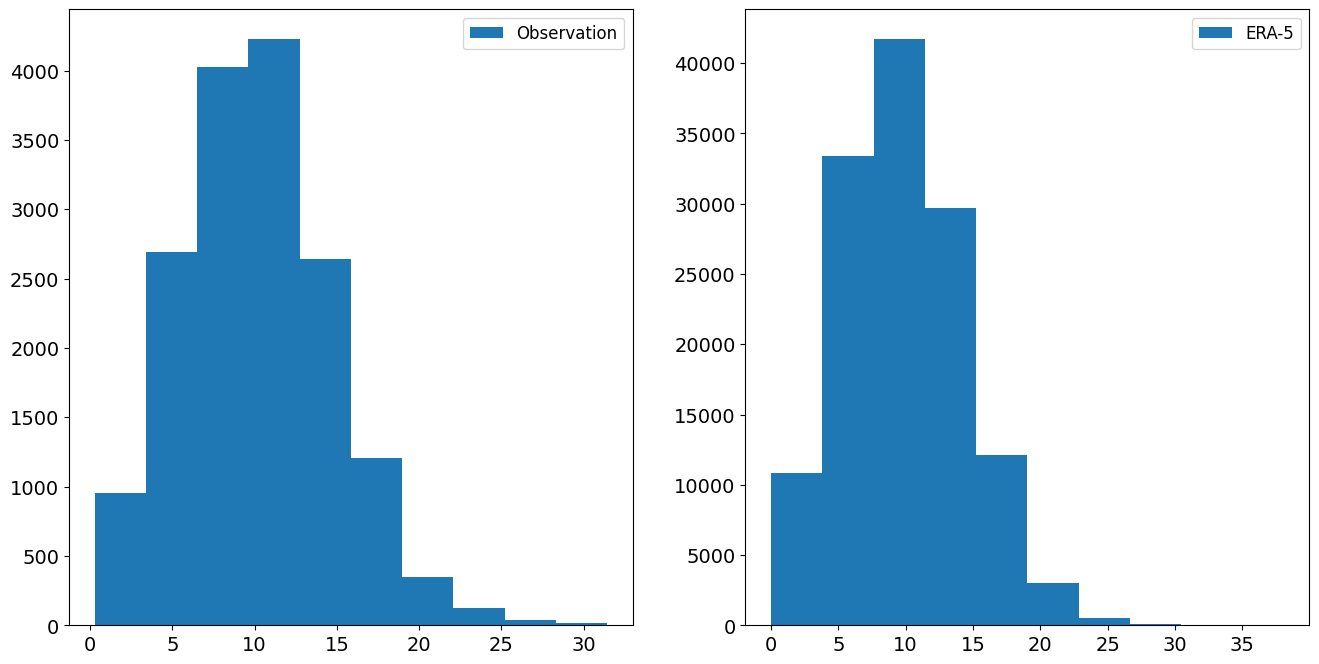

In [126]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.hist(df['WS-90-DD345'],label='Observation')
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend(fontsize= 12)

fig.add_subplot(122)
plt.hist(df['WS-100'],label='ERA-5')
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend(fontsize= 12)

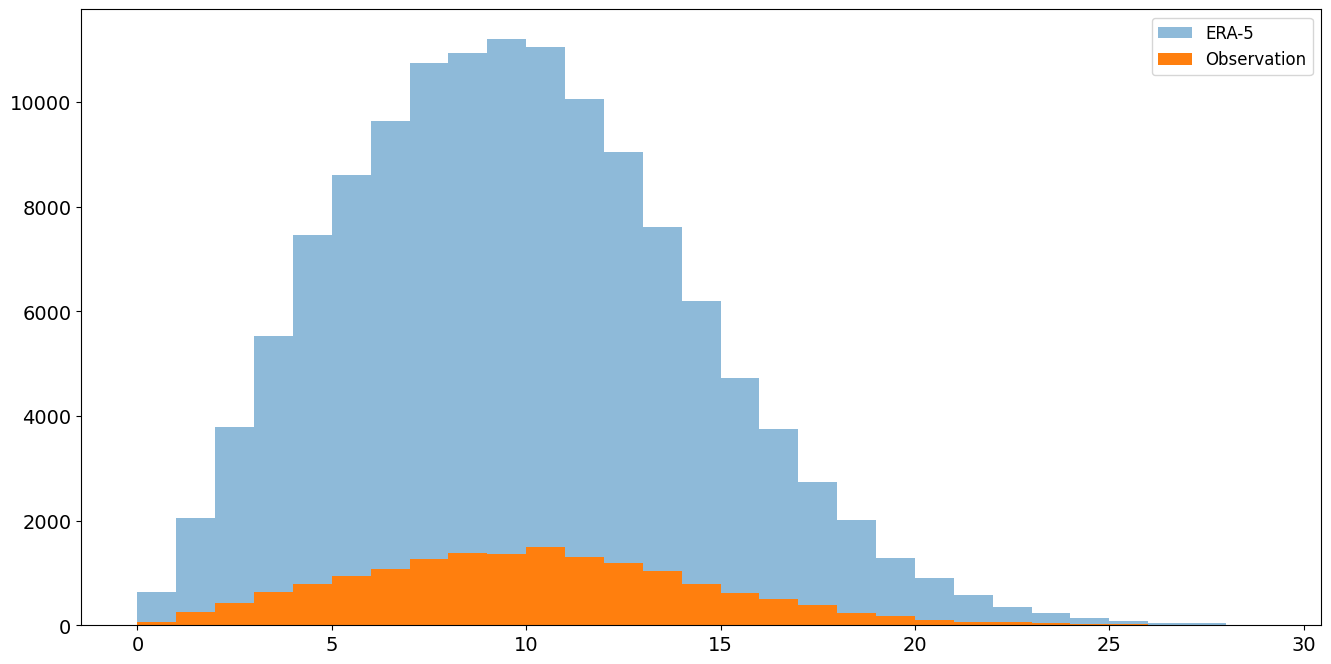

In [127]:

nbins = np.arange(0,30,1)

fig = plt.figure(figsize=(16,8))
plt.hist(df['WS-100'],nbins,label='ERA-5',alpha=0.5)
plt.hist(df['WS-90-DD345'],nbins,label='Observation')
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend(fontsize= 12)

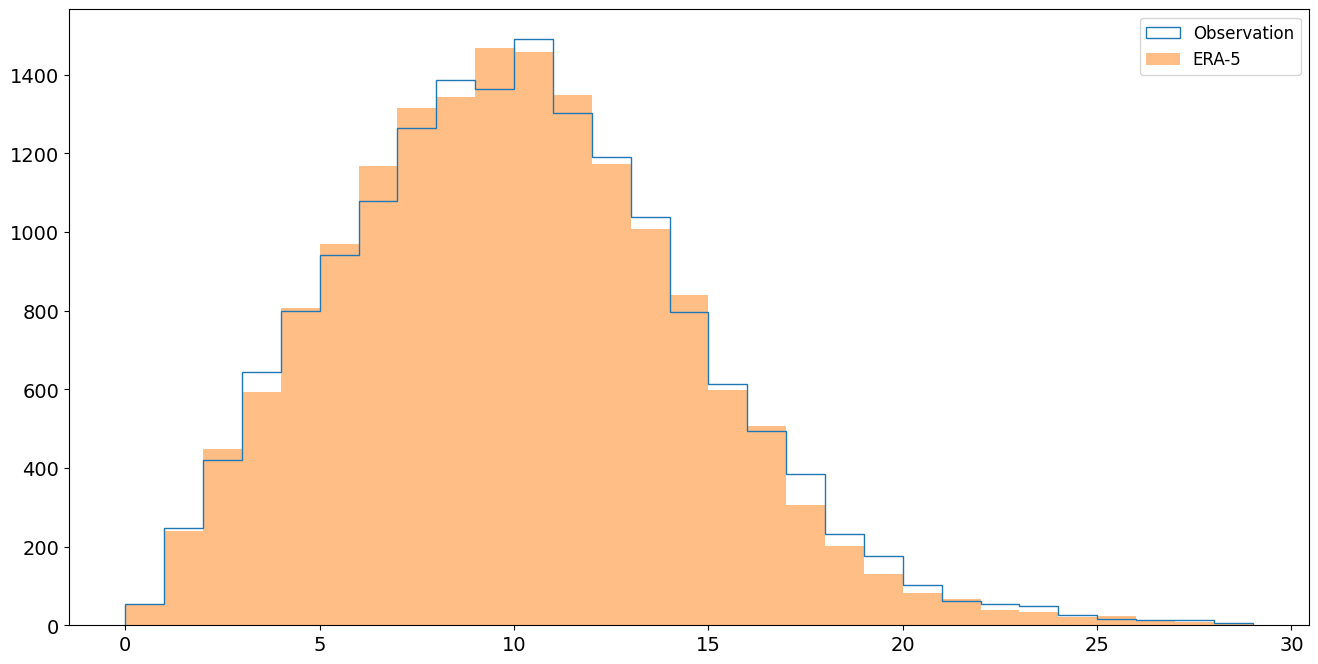

In [128]:
idx  = df[df['WS-90-DD345'].notnull()].index
nbins = np.arange(0,30,1)

fig = plt.figure(figsize=(16,8))
plt.hist(df['WS-90-DD345'].loc[idx],nbins,label='Observation',histtype='step')
plt.hist(df['WS-100'].loc[idx],nbins,label='ERA-5',alpha=0.5)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend(fontsize= 12)


**5. Model development**

**5.a. Preprocessing**

In [129]:
# choose a value for comparability
RSEED     = 42

# define how many percent of data should be excluded from training to use it for testing
test_size = 0.3

# set variables 
# model data = Features 
X = pd.DataFrame(df[['WS-100','WD-100','Mon','Hour','blh']])

# valid values = observations
Y = pd.DataFrame(df['WS-90-DD345'].copy())

In [130]:
# remove nan values
# find index of nan values
idx           = Y[Y.isnull().any(axis=1)].index

#find index of valid values
valid_values  = Y[Y.notnull().all(axis=1)].index

XtoPredict    = X.loc[idx]

# features
x             = X.loc[valid_values]

# target
y             = Y.loc[valid_values]
xcols         = X.columns

In [131]:
# split data into training and test data (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=RSEED)

In [132]:
# scale data to a common basis (e.g. WS ranges from 0-30 m/s while wind direction from 0 to 360, scaling fits them into a common range)
# scaling is done based on trainings data (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
X_train_scaled    = scaler.fit_transform(X_train)

# scaling procedure is transfered to test data
X_test_scaled     = scaler.transform(X_test)   

**5.b. Model training**

In [133]:
# Preparation
# set hyperparameters for ML-model
param_grid = {
              "n_neighbors"       : [2,5,12,30],
              "leaf_size"         : [3,15,30,40],
              "p"                 : [1,2],
              "weights"           : ['uniform', 'distance'],
              "metric"            : ['euclidean','manhattan','minkowski'] 
             }

# chose which ML model to use (e.g. linear regression, random Forest, Decision tree, AdaBoost, XGBoost, Ridge regression, )
# check sklearn + model for correct naming and more information)
# consider to import the packages before
classifier = KNeighborsRegressor()

# how many times shall the cross validation been done
n          = 5

# according to which metrics shall the performance been tested
scoring    = 'neg_mean_squared_error'

In [134]:
# train the model
# GridSearch finds the best parameter combination for the model for which the score is minimal. 
# A cross validation is done to compare results from different subsets, 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
grid_model = GridSearchCV(classifier, param_grid=param_grid, cv=n, scoring=scoring,\
                                  verbose=0, n_jobs=-1).fit(X_train_scaled, y_train)

best_model = grid_model.best_estimator_
print('Best score:\n{:.2f}'.format(grid_model.best_score_))
print("Best parameters:\n{}".format(grid_model.best_params_))


Best score:
-1.64
Best parameters:
{'leaf_size': 3, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [135]:
# make predictions using the trainings to check model performance
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_train_cv      = cross_val_predict(best_model, X_train_scaled, y_train, cv=n+2)

In [136]:
#Prepare printout
def print_performance(y_predicted,y_true):
    print('Validation scores:')
    print('-------------------------')
    print('R2-Score: ',round(r2_score(y_true, y_predicted),4))
    print('MSE: ',mean_squared_error(y_true, y_predicted).round(4))
    print('RMSE: ',root_mean_squared_error(y_true, y_predicted).round(4))
    print('MAE: ',mean_absolute_error(y_true, y_predicted).round(4))
    print('MAPE: ',(mean_absolute_percentage_error(y_true, y_predicted)*100).round(4))

In [137]:
# print performance from cross validation (trainingsdata only)
print_performance(y_train_cv,y_train)

Validation scores:
-------------------------
R2-Score:  0.9218
MSE:  1.6026
RMSE:  1.2659
MAE:  0.9141
MAPE:  13.2275


In [138]:
# print same values for raw data (without any correction, for comparison) 
print_performance(x['WS-100'],y)

Validation scores:
-------------------------
R2-Score:  0.8914
MSE:  2.2272
RMSE:  1.4924
MAE:  1.0974
MAPE:  14.6078


**6. Verification**

In [139]:
# predict values using trained model and test data (features)
y_test_predicted = best_model.predict(X_test_scaled)

# print performance of model using test data
print_performance(y_test_predicted,y_test)

Validation scores:
-------------------------
R2-Score:  0.9265
MSE:  1.5105
RMSE:  1.229
MAE:  0.8756
MAPE:  12.9463


**8. Make your predictions**

In [140]:
# make your final prediction for the entire (long-term) period
X_scaledN               = scaler.transform(X)
predictions             = best_model.predict(X_scaledN)

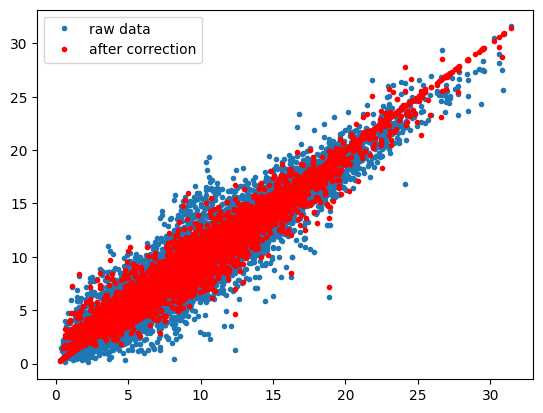

In [141]:
# plot raw data 
plt.plot(df['WS-90-DD345'].loc[valid_values],df['WS-100'].loc[valid_values],'.',label='raw data')
plt.plot(df['WS-90-DD345'].loc[valid_values],predictions[valid_values],'.',label='after correction',color='r')
plt.legend()

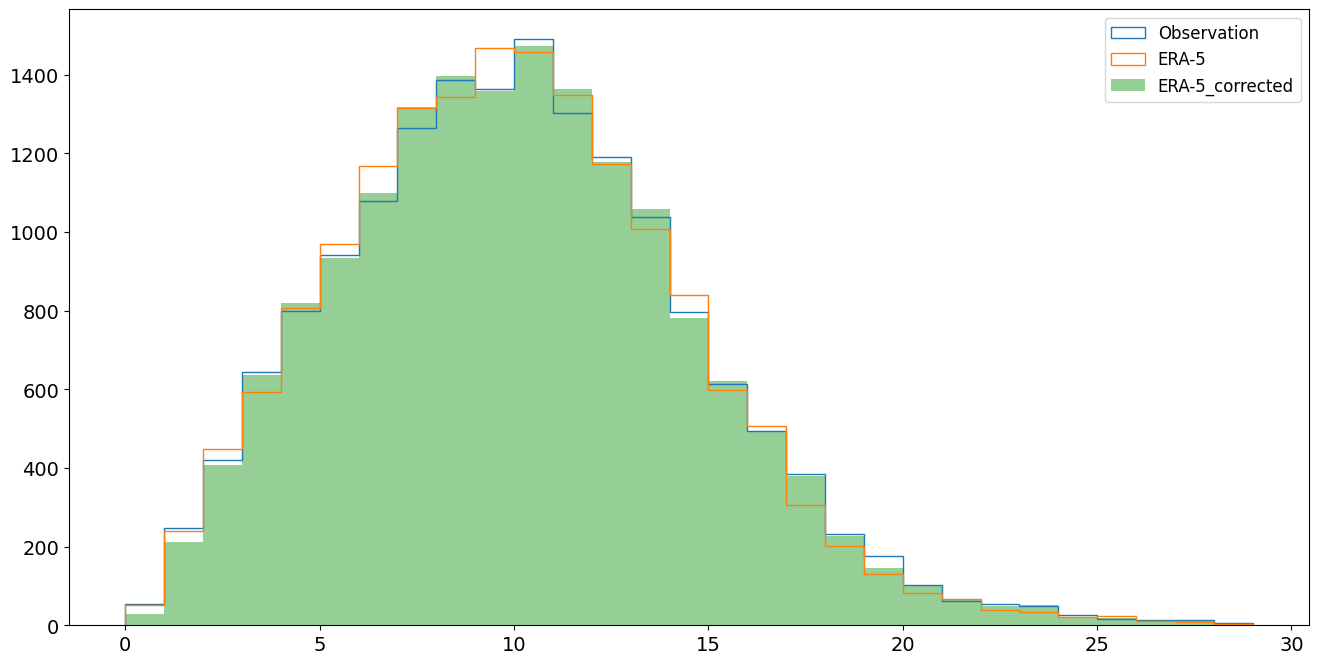

In [143]:
nbins = np.arange(0,30,1)

fig = plt.figure(figsize=(16,8))
plt.hist(df['WS-90-DD345'].loc[valid_values],nbins,label='Observation',histtype='step')
plt.hist(df['WS-100'].loc[valid_values],nbins,label='ERA-5',histtype='step')
plt.hist(predictions[valid_values],nbins,label='ERA-5_corrected',alpha=0.5)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend(fontsize= 12)

**7. Workflow tuning**

**TASK 4: Test another ML Regressor**

**TASK 5: Test another Feature setting** 

**TASK 6: Test MCP with only 1 year of data for training**

## Literature recommendation:

**Book:** Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron, ISBN: 9781492032649

**Videos (short):** Statquest (https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF)

**Training possibilities:** \
Kaggle (https://www.kaggle.com/) \
Code Wars (https://www.codewars.com/)